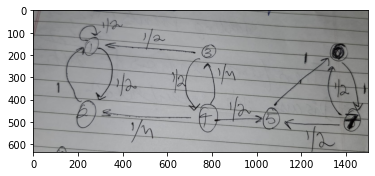

In [6]:
import matplotlib.pyplot as plt
pic=plt.imread("math444pic5.jpg")
plt.imshow(pic);

Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): 1
Choose a starting point (1-7): 5
Enter the number of steps: 100
Number of steps: 100
Path taken in the random walk: [5, 6, 7, 5, 6, 7, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 5, 6, 7, 6, 7, 5, 6, 7, 6, 7, 5, 6, 7, 5, 6, 7, 6, 7, 5, 6, 7, 6, 7, 5, 6, 7, 6, 7, 6, 7, 6, 7, 5, 6, 7, 5, 6, 7, 6, 7, 6, 7, 5, 6, 7, 6, 7, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 6, 7, 6, 7, 6, 7, 5, 6, 7]
Probability distribution after 100 steps: [0.  0.  0.  0.  0.2 0.4 0.4]
Calculating long-term distribution...
Long-term distribution starting from custom distribution: [0.       0.       0.       0.       0.206148 0.398926 0.394926]
The state with the highest long-term probability is State 6 with a probability of 0.3989.


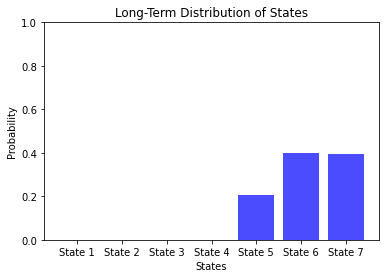

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the 7x7 column-stochastic transition matrix
transition_matrix = np.array([
    [1/2, 1, 1/2, 0, 0, 0, 0],
    [1/2, 0, 0, 1/4, 0, 0, 0],
    [0, 0, 0, 1/4, 0, 0, 0],
    [0, 0, 1/2, 0, 0, 0, 0],
    [0, 0, 0, 1/2, 0, 0, 1/2],
    [0, 0, 0, 0, 1, 0, 1/2],
    [0, 0, 0, 0, 0, 1, 0]
])

# Function to simulate the random walk
def random_walk(transition_matrix, start, n_steps):
    state = start
    visits = np.zeros(7)  # Keep track of visits to each state
    for _ in range(n_steps):
        visits[state] += 1  # Count visit to the current state
        state = np.random.choice(range(7), p=transition_matrix[:, state])
    return visits

# Function to print the path taken in the random walk
def print_random_walk_path(transition_matrix, start, n_steps):
    state = start
    path = [state + 1]  # Start path with the initial state (adjusted for 1-based index)
    for _ in range(n_steps):
        state = np.random.choice(range(7), p=transition_matrix[:, state])
        path.append(state + 1)  # Append each state as 1-based
    print("Path taken in the random walk:", path)

# Function to simulate the long-term distribution based on multiple cycles
def simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=1000):
    all_distributions = np.zeros((cycles, 7))  # Store distributions for each cycle

    for cycle in range(cycles):
        visits = random_walk(transition_matrix, np.random.choice(range(7), p=start_distribution), n_steps)
        all_distributions[cycle] = visits / n_steps  # Normalize visits to get distribution

    long_term_distribution = np.mean(all_distributions, axis=0)  # Average distribution over cycles
    return long_term_distribution

# Function to calculate the probability distribution after n steps
def probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps):
    start_distribution = start_distribution / np.sum(start_distribution)  # Normalize the initial state vector
    transition_matrix_n_steps = np.linalg.matrix_power(transition_matrix, n_steps)
    new_distribution = transition_matrix_n_steps @ start_distribution
    return new_distribution

# Visualize the long-term distribution as a bar graph
def visualize_long_term_distribution(long_term_distribution):
    states = [f"State {i + 1}" for i in range(7)]
    plt.bar(states, long_term_distribution, color='blue', alpha=0.7)

    highest_prob_state = np.argmax(long_term_distribution) + 1
    highest_prob_value = long_term_distribution[highest_prob_state - 1]

    print(f"The state with the highest long-term probability is State {highest_prob_state} with a probability of {highest_prob_value:.4f}.")

    plt.title("Long-Term Distribution of States")
    plt.ylabel("Probability")
    plt.xlabel("States")
    plt.ylim(0, 1)
    plt.show()

# Main program to interact with the user
def main():
    # User chooses whether to pick a starting point or random
    choice = input("Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): ")
    if choice == '1':
        start = int(input("Choose a starting point (1-7): ")) - 1  # Convert to 0-based index
        if start < 0 or start > 6:
            print("Invalid starting point, defaulting to 1.")
            start = 0
        start_distribution = np.zeros(7)
        start_distribution[start] = 1
    elif choice == '2':
        start_vector = input("Enter a custom initial state vector (comma-separated probabilities for states 1-7): ")
        start_distribution = np.array([float(x) for x in start_vector.split(",")])
        if np.sum(start_distribution) != 1 or len(start_distribution) != 7:
            print("Invalid input. Defaulting to uniform distribution.")
            start_distribution = np.array([1/7] * 7)
    else:
        start = random.choice(range(7))
        start_distribution = np.zeros(7)
        start_distribution[start] = 1
        print(f"Randomly chosen starting point: State {start + 1}")

    # User inputs the number of steps
    n_steps = int(input("Enter the number of steps: "))
    print(f"Number of steps: {n_steps}")

    # Print the random walk path
    print_random_walk_path(transition_matrix, start, n_steps)

    # Calculate and print the probability distribution after n steps
    prob_dist_n_steps = probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps)
    print("Probability distribution after", n_steps, "steps:", prob_dist_n_steps)

    # Simulate the long-term distribution
    print("Calculating long-term distribution...")
    long_term_distribution = simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=10000)
    print("Long-term distribution starting from custom distribution:", long_term_distribution)

    # Visualize the long-term distribution
    visualize_long_term_distribution(long_term_distribution)

# Run the main function
if __name__ == "__main__":
    main()

Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): 1
Choose a starting point (1-7): 3
Enter the number of steps: 100
Number of steps: 100
Path taken in the random walk: [3, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1]
Probability distribution after 100 steps: [4.76190476e-01 2.38095238e-01 7.00649232e-46 0.00000000e+00
 5.71428571e-02 1.14285714e-01 1.14285714e-01]
Calculating long-term distribution...
Long-term distribution starting from custom distribution: [0.470418 0.234159 0.011432 0.005685 0.05724  0.111101 0.109965]
The state with the highest long-term probability is State 1 with a probability of 0.4704.


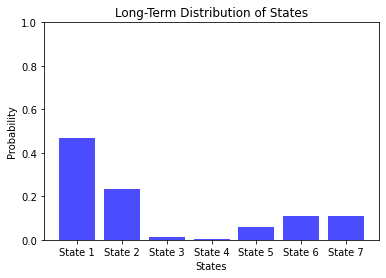

Simulating which group is reached first...
Out of 10000 simulations:
Group 1 (States 1 and 2) was reached first in 7159 simulations. Ratio: 0.7159
Group 2 (States 5, 6, and 7) was reached first in 2841 simulations. Ratio: 0.2841


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the 7x7 column-stochastic transition matrix
transition_matrix = np.array([
    [1/2, 1, 1/2, 0, 0, 0, 0],
    [1/2, 0, 0, 1/4, 0, 0, 0],
    [0, 0, 0, 1/4, 0, 0, 0],
    [0, 0, 1/2, 0, 0, 0, 0],
    [0, 0, 0, 1/2, 0, 0, 1/2],
    [0, 0, 0, 0, 1, 0, 1/2],
    [0, 0, 0, 0, 0, 1, 0]
])

# Function to simulate the random walk
def random_walk(transition_matrix, start, n_steps):
    state = start
    visits = np.zeros(7)  # Keep track of visits to each state
    for _ in range(n_steps):
        visits[state] += 1  # Count visit to the current state
        state = np.random.choice(range(7), p=transition_matrix[:, state])
    return visits

# Function to print the path taken in the random walk
def print_random_walk_path(transition_matrix, start, n_steps):
    state = start
    path = [state + 1]  # Start path with the initial state (adjusted for 1-based index)
    for _ in range(n_steps):
        state = np.random.choice(range(7), p=transition_matrix[:, state])
        path.append(state + 1)  # Append each state as 1-based
    print("Path taken in the random walk:", path)

# Function to simulate the long-term distribution based on multiple cycles
def simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=1000):
    all_distributions = np.zeros((cycles, 7))  # Store distributions for each cycle

    for cycle in range(cycles):
        visits = random_walk(transition_matrix, np.random.choice(range(7), p=start_distribution), n_steps)
        all_distributions[cycle] = visits / n_steps  # Normalize visits to get distribution

    long_term_distribution = np.mean(all_distributions, axis=0)  # Average distribution over cycles
    return long_term_distribution

# Function to calculate the probability distribution after n steps
def probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps):
    start_distribution = start_distribution / np.sum(start_distribution)  # Normalize the initial state vector
    transition_matrix_n_steps = np.linalg.matrix_power(transition_matrix, n_steps)
    new_distribution = transition_matrix_n_steps @ start_distribution
    return new_distribution

# New Function: Determine which group is reached first
def group_first_visit_simulation(transition_matrix, start, n_steps, cycles=10000):
    group_1 = {0, 1}  # States 1 and 2 (0-based indexing)
    group_2 = {4, 5, 6}  # States 5, 6, and 7 (0-based indexing)

    group_1_count = 0
    group_2_count = 0

    for _ in range(cycles):
        state = start
        for _ in range(n_steps):
            if state in group_1:
                group_1_count += 1
                break
            elif state in group_2:
                group_2_count += 1
                break
            state = np.random.choice(range(7), p=transition_matrix[:, state])

    group_1_ratio = group_1_count / cycles
    group_2_ratio = group_2_count / cycles

    print(f"Out of {cycles} simulations:")
    print(f"Group 1 (States 1 and 2) was reached first in {group_1_count} simulations. Ratio: {group_1_ratio:.4f}")
    print(f"Group 2 (States 5, 6, and 7) was reached first in {group_2_count} simulations. Ratio: {group_2_ratio:.4f}")

# Visualize the long-term distribution as a bar graph
def visualize_long_term_distribution(long_term_distribution):
    states = [f"State {i + 1}" for i in range(7)]
    plt.bar(states, long_term_distribution, color='blue', alpha=0.7)

    highest_prob_state = np.argmax(long_term_distribution) + 1
    highest_prob_value = long_term_distribution[highest_prob_state - 1]

    print(f"The state with the highest long-term probability is State {highest_prob_state} with a probability of {highest_prob_value:.4f}.")

    plt.title("Long-Term Distribution of States")
    plt.ylabel("Probability")
    plt.xlabel("States")
    plt.ylim(0, 1)
    plt.show()

# Main program to interact with the user
def main():
    # User chooses whether to pick a starting point or random
    choice = input("Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): ")
    if choice == '1':
        start = int(input("Choose a starting point (1-7): ")) - 1  # Convert to 0-based index
        if start < 0 or start > 6:
            print("Invalid starting point, defaulting to 1.")
            start = 0
        start_distribution = np.zeros(7)
        start_distribution[start] = 1
    elif choice == '2':
        start_vector = input("Enter a custom initial state vector (comma-separated probabilities for states 1-7): ")
        start_distribution = np.array([float(x) for x in start_vector.split(",")])
        if np.sum(start_distribution) != 1 or len(start_distribution) != 7:
            print("Invalid input. Defaulting to uniform distribution.")
            start_distribution = np.array([1/7] * 7)
    else:
        start = random.choice(range(7))
        start_distribution = np.zeros(7)
        start_distribution[start] = 1
        print(f"Randomly chosen starting point: State {start + 1}")

    # User inputs the number of steps
    n_steps = int(input("Enter the number of steps: "))
    print(f"Number of steps: {n_steps}")

    # Print the random walk path
    print_random_walk_path(transition_matrix, start, n_steps)

    # Calculate and print the probability distribution after n steps
    prob_dist_n_steps = probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps)
    print("Probability distribution after", n_steps, "steps:", prob_dist_n_steps)

    # Simulate the long-term distribution
    print("Calculating long-term distribution...")
    long_term_distribution = simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=10000)
    print("Long-term distribution starting from custom distribution:", long_term_distribution)

    # Visualize the long-term distribution
    visualize_long_term_distribution(long_term_distribution)

    # Perform group-first-visit simulation
    print("Simulating which group is reached first...")
    group_first_visit_simulation(transition_matrix, start, n_steps, cycles=10000)

# Run the main function
if __name__ == "__main__":
    main()